# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
!pip install --quiet matplotlib==2.2.0 tensorflow==1.4.0 tensorflow-gpu==1.4.0

  Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))': /simple/kiwisolver/


In [4]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

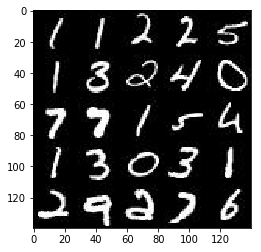

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

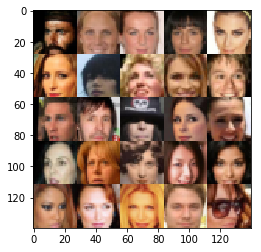

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


TensorFlow Version: 1.4.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [9]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='inputs_z')
    learnrate = tf.placeholder(tf.float32, name='learnrate')

    return inputs_real, inputs_z, learnrate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [46]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        x = tf.layers.conv2d(images, 64, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.nn.leaky_relu(x, alpha=.02)
        x = tf.layers.conv2d(x, 128, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x)
        x = tf.nn.leaky_relu(x, alpha=.02)
        x = tf.layers.conv2d(x, 256, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x)
        x = tf.nn.leaky_relu(x, alpha=.02)
        
        x = tf.layers.flatten(x)
        logits = tf.layers.dense(x, 1)
        out = tf.nn.sigmoid(logits)


    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [47]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        x = tf.layers.dense(z, 7*7*512)
        x = tf.reshape(x, (-1, 7, 7, 512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.nn.leaky_relu(x, alpha=.02)        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.nn.leaky_relu(x, alpha=.02)        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.nn.leaky_relu(x, alpha=.02)        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [48]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [49]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [50]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [51]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    width, height, channel = data_shape[1], data_shape[2], data_shape[3]
    
    input_real, input_z, learn_rate = model_inputs(width, height, channel, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channel)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    saver = tf.train.Saver()

    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1

                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                
#                 learning_rate *= .95

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}..., step {}".format(epoch_i+1, epochs, steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, channel, data_image_mode)

        saver.save(sess, './generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2..., step 10 Discriminator Loss: 1.7422... Generator Loss: 0.2855
Epoch 1/2..., step 20 Discriminator Loss: 0.6054... Generator Loss: 3.2157
Epoch 1/2..., step 30 Discriminator Loss: 0.7896... Generator Loss: 1.9590
Epoch 1/2..., step 40 Discriminator Loss: 0.5120... Generator Loss: 2.4724
Epoch 1/2..., step 50 Discriminator Loss: 0.3975... Generator Loss: 3.7091
Epoch 1/2..., step 60 Discriminator Loss: 0.3579... Generator Loss: 5.3464
Epoch 1/2..., step 70 Discriminator Loss: 0.3608... Generator Loss: 4.6068
Epoch 1/2..., step 80 Discriminator Loss: 0.3447... Generator Loss: 4.5313
Epoch 1/2..., step 90 Discriminator Loss: 1.3966... Generator Loss: 0.8681
Epoch 1/2..., step 100 Discriminator Loss: 0.8106... Generator Loss: 1.8650


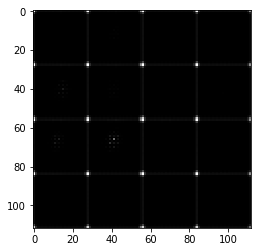

Epoch 1/2..., step 110 Discriminator Loss: 0.3528... Generator Loss: 4.3440
Epoch 1/2..., step 120 Discriminator Loss: 0.3341... Generator Loss: 5.5750
Epoch 1/2..., step 130 Discriminator Loss: 0.5797... Generator Loss: 4.9223
Epoch 1/2..., step 140 Discriminator Loss: 0.5651... Generator Loss: 2.9283
Epoch 1/2..., step 150 Discriminator Loss: 0.5385... Generator Loss: 2.6912
Epoch 1/2..., step 160 Discriminator Loss: 0.6659... Generator Loss: 2.1330
Epoch 1/2..., step 170 Discriminator Loss: 0.5667... Generator Loss: 3.1353
Epoch 1/2..., step 180 Discriminator Loss: 0.9788... Generator Loss: 1.7032
Epoch 1/2..., step 190 Discriminator Loss: 1.1582... Generator Loss: 1.5527
Epoch 1/2..., step 200 Discriminator Loss: 0.9570... Generator Loss: 1.2285


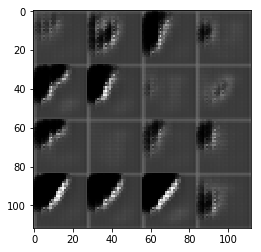

Epoch 1/2..., step 210 Discriminator Loss: 0.7718... Generator Loss: 2.3376
Epoch 1/2..., step 220 Discriminator Loss: 1.0334... Generator Loss: 1.1996
Epoch 1/2..., step 230 Discriminator Loss: 0.9068... Generator Loss: 2.0278
Epoch 1/2..., step 240 Discriminator Loss: 1.0851... Generator Loss: 1.1713
Epoch 1/2..., step 250 Discriminator Loss: 0.9099... Generator Loss: 2.1066
Epoch 1/2..., step 260 Discriminator Loss: 1.0461... Generator Loss: 1.6878
Epoch 1/2..., step 270 Discriminator Loss: 0.8768... Generator Loss: 1.2135
Epoch 1/2..., step 280 Discriminator Loss: 0.9002... Generator Loss: 1.5087
Epoch 1/2..., step 290 Discriminator Loss: 0.9670... Generator Loss: 1.4422
Epoch 1/2..., step 300 Discriminator Loss: 0.6400... Generator Loss: 3.1174


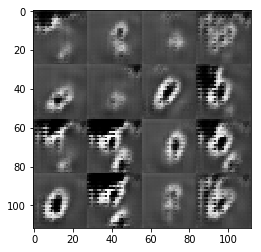

Epoch 1/2..., step 310 Discriminator Loss: 0.9806... Generator Loss: 1.2390
Epoch 1/2..., step 320 Discriminator Loss: 1.1250... Generator Loss: 0.7520
Epoch 1/2..., step 330 Discriminator Loss: 0.9375... Generator Loss: 1.3948
Epoch 1/2..., step 340 Discriminator Loss: 0.7953... Generator Loss: 1.6570
Epoch 1/2..., step 350 Discriminator Loss: 1.0652... Generator Loss: 2.2600
Epoch 1/2..., step 360 Discriminator Loss: 0.8556... Generator Loss: 1.6415
Epoch 1/2..., step 370 Discriminator Loss: 0.6372... Generator Loss: 2.7943
Epoch 1/2..., step 380 Discriminator Loss: 0.8993... Generator Loss: 2.1501
Epoch 1/2..., step 390 Discriminator Loss: 1.3157... Generator Loss: 0.7043
Epoch 1/2..., step 400 Discriminator Loss: 0.8319... Generator Loss: 2.0082


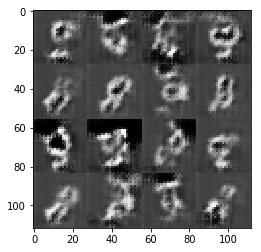

Epoch 1/2..., step 410 Discriminator Loss: 0.7115... Generator Loss: 1.9425
Epoch 1/2..., step 420 Discriminator Loss: 1.0528... Generator Loss: 1.4254
Epoch 1/2..., step 430 Discriminator Loss: 0.8470... Generator Loss: 2.1449
Epoch 1/2..., step 440 Discriminator Loss: 0.9016... Generator Loss: 1.5271
Epoch 1/2..., step 450 Discriminator Loss: 0.9257... Generator Loss: 1.7606
Epoch 1/2..., step 460 Discriminator Loss: 1.0245... Generator Loss: 2.1663
Epoch 1/2..., step 470 Discriminator Loss: 0.6496... Generator Loss: 2.4240
Epoch 1/2..., step 480 Discriminator Loss: 0.8695... Generator Loss: 2.7213
Epoch 1/2..., step 490 Discriminator Loss: 0.7890... Generator Loss: 2.4350
Epoch 1/2..., step 500 Discriminator Loss: 1.0081... Generator Loss: 1.8967


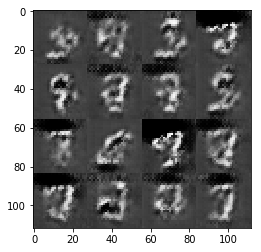

Epoch 1/2..., step 510 Discriminator Loss: 0.8528... Generator Loss: 2.2739
Epoch 1/2..., step 520 Discriminator Loss: 0.7661... Generator Loss: 2.7809
Epoch 1/2..., step 530 Discriminator Loss: 0.9147... Generator Loss: 1.4691
Epoch 1/2..., step 540 Discriminator Loss: 0.8756... Generator Loss: 1.6825
Epoch 1/2..., step 550 Discriminator Loss: 0.8625... Generator Loss: 2.4478
Epoch 1/2..., step 560 Discriminator Loss: 0.9723... Generator Loss: 1.2893
Epoch 1/2..., step 570 Discriminator Loss: 0.6921... Generator Loss: 2.1236
Epoch 1/2..., step 580 Discriminator Loss: 0.9708... Generator Loss: 1.7390
Epoch 1/2..., step 590 Discriminator Loss: 0.7172... Generator Loss: 3.1462
Epoch 1/2..., step 600 Discriminator Loss: 0.7170... Generator Loss: 2.4961


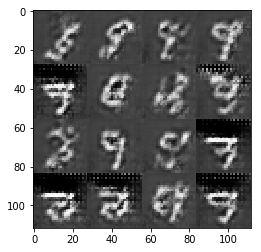

Epoch 1/2..., step 610 Discriminator Loss: 0.8781... Generator Loss: 1.9219
Epoch 1/2..., step 620 Discriminator Loss: 0.7489... Generator Loss: 3.0906
Epoch 1/2..., step 630 Discriminator Loss: 0.6496... Generator Loss: 3.4461
Epoch 1/2..., step 640 Discriminator Loss: 1.2470... Generator Loss: 1.1907
Epoch 1/2..., step 650 Discriminator Loss: 0.9751... Generator Loss: 1.9735
Epoch 1/2..., step 660 Discriminator Loss: 0.7299... Generator Loss: 4.5190
Epoch 1/2..., step 670 Discriminator Loss: 0.7955... Generator Loss: 2.7803
Epoch 1/2..., step 680 Discriminator Loss: 0.7885... Generator Loss: 2.5437
Epoch 1/2..., step 690 Discriminator Loss: 0.9277... Generator Loss: 2.2736
Epoch 1/2..., step 700 Discriminator Loss: 0.7113... Generator Loss: 2.0042


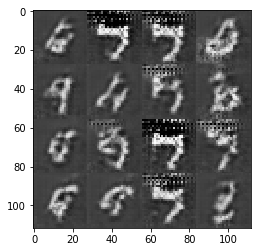

Epoch 1/2..., step 710 Discriminator Loss: 0.9127... Generator Loss: 2.5378
Epoch 1/2..., step 720 Discriminator Loss: 0.8287... Generator Loss: 3.0930
Epoch 1/2..., step 730 Discriminator Loss: 0.8102... Generator Loss: 2.7586
Epoch 1/2..., step 740 Discriminator Loss: 0.7406... Generator Loss: 2.1851
Epoch 1/2..., step 750 Discriminator Loss: 1.0530... Generator Loss: 1.6734
Epoch 1/2..., step 760 Discriminator Loss: 0.7307... Generator Loss: 3.1863
Epoch 1/2..., step 770 Discriminator Loss: 0.9222... Generator Loss: 1.0561
Epoch 1/2..., step 780 Discriminator Loss: 0.8659... Generator Loss: 2.8214
Epoch 1/2..., step 790 Discriminator Loss: 0.8213... Generator Loss: 2.6378
Epoch 1/2..., step 800 Discriminator Loss: 1.1333... Generator Loss: 1.6539


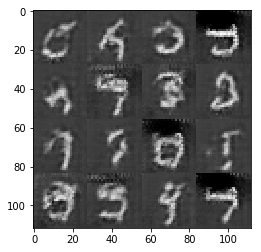

Epoch 1/2..., step 810 Discriminator Loss: 0.8926... Generator Loss: 3.3986
Epoch 1/2..., step 820 Discriminator Loss: 1.0567... Generator Loss: 3.9214
Epoch 1/2..., step 830 Discriminator Loss: 0.9298... Generator Loss: 2.1491
Epoch 1/2..., step 840 Discriminator Loss: 0.9645... Generator Loss: 4.0664
Epoch 1/2..., step 850 Discriminator Loss: 0.9381... Generator Loss: 2.7155
Epoch 1/2..., step 860 Discriminator Loss: 0.8679... Generator Loss: 1.7745
Epoch 1/2..., step 870 Discriminator Loss: 0.6559... Generator Loss: 5.1909
Epoch 1/2..., step 880 Discriminator Loss: 0.7735... Generator Loss: 3.3428
Epoch 1/2..., step 890 Discriminator Loss: 0.8141... Generator Loss: 3.6021
Epoch 1/2..., step 900 Discriminator Loss: 1.1968... Generator Loss: 1.8240


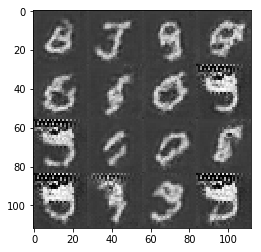

Epoch 1/2..., step 910 Discriminator Loss: 1.3633... Generator Loss: 1.3839
Epoch 1/2..., step 920 Discriminator Loss: 0.8051... Generator Loss: 3.4504
Epoch 1/2..., step 930 Discriminator Loss: 0.9074... Generator Loss: 1.7131
Epoch 2/2..., step 940 Discriminator Loss: 0.8719... Generator Loss: 3.2211
Epoch 2/2..., step 950 Discriminator Loss: 0.6646... Generator Loss: 3.5809
Epoch 2/2..., step 960 Discriminator Loss: 0.7604... Generator Loss: 2.6525
Epoch 2/2..., step 970 Discriminator Loss: 1.0268... Generator Loss: 1.8654
Epoch 2/2..., step 980 Discriminator Loss: 0.8298... Generator Loss: 3.5476
Epoch 2/2..., step 990 Discriminator Loss: 0.8479... Generator Loss: 2.2573
Epoch 2/2..., step 1000 Discriminator Loss: 0.8545... Generator Loss: 1.9605


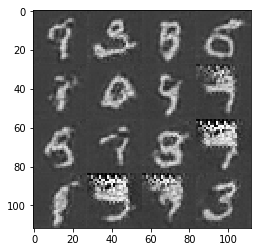

Epoch 2/2..., step 1010 Discriminator Loss: 1.1383... Generator Loss: 2.7229
Epoch 2/2..., step 1020 Discriminator Loss: 0.8919... Generator Loss: 1.9285
Epoch 2/2..., step 1030 Discriminator Loss: 1.3054... Generator Loss: 1.0698
Epoch 2/2..., step 1040 Discriminator Loss: 0.7013... Generator Loss: 2.6520
Epoch 2/2..., step 1050 Discriminator Loss: 0.8464... Generator Loss: 2.1698
Epoch 2/2..., step 1060 Discriminator Loss: 1.3684... Generator Loss: 0.9282
Epoch 2/2..., step 1070 Discriminator Loss: 1.2278... Generator Loss: 1.1101
Epoch 2/2..., step 1080 Discriminator Loss: 1.0697... Generator Loss: 1.5928
Epoch 2/2..., step 1090 Discriminator Loss: 0.8856... Generator Loss: 1.5721
Epoch 2/2..., step 1100 Discriminator Loss: 1.0486... Generator Loss: 0.9361


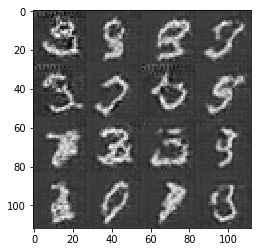

Epoch 2/2..., step 1110 Discriminator Loss: 0.9349... Generator Loss: 1.3495
Epoch 2/2..., step 1120 Discriminator Loss: 1.0220... Generator Loss: 1.0255
Epoch 2/2..., step 1130 Discriminator Loss: 0.9679... Generator Loss: 2.1856
Epoch 2/2..., step 1140 Discriminator Loss: 0.9286... Generator Loss: 1.5750
Epoch 2/2..., step 1150 Discriminator Loss: 0.5999... Generator Loss: 3.7623
Epoch 2/2..., step 1160 Discriminator Loss: 1.2475... Generator Loss: 3.6743
Epoch 2/2..., step 1170 Discriminator Loss: 1.0058... Generator Loss: 1.2429
Epoch 2/2..., step 1180 Discriminator Loss: 0.8450... Generator Loss: 1.8132
Epoch 2/2..., step 1190 Discriminator Loss: 0.9505... Generator Loss: 1.5048
Epoch 2/2..., step 1200 Discriminator Loss: 0.8378... Generator Loss: 2.0517


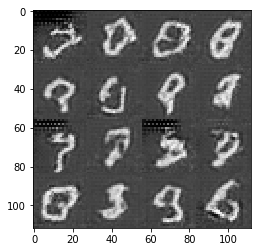

Epoch 2/2..., step 1210 Discriminator Loss: 1.2936... Generator Loss: 0.8531
Epoch 2/2..., step 1220 Discriminator Loss: 0.9285... Generator Loss: 1.5722
Epoch 2/2..., step 1230 Discriminator Loss: 0.8938... Generator Loss: 2.4341
Epoch 2/2..., step 1240 Discriminator Loss: 1.1815... Generator Loss: 3.0361
Epoch 2/2..., step 1250 Discriminator Loss: 0.8995... Generator Loss: 1.9819
Epoch 2/2..., step 1260 Discriminator Loss: 0.8573... Generator Loss: 1.7370
Epoch 2/2..., step 1270 Discriminator Loss: 0.6402... Generator Loss: 3.4997
Epoch 2/2..., step 1280 Discriminator Loss: 1.0177... Generator Loss: 1.3778
Epoch 2/2..., step 1290 Discriminator Loss: 0.8490... Generator Loss: 1.9973
Epoch 2/2..., step 1300 Discriminator Loss: 1.8920... Generator Loss: 0.6275


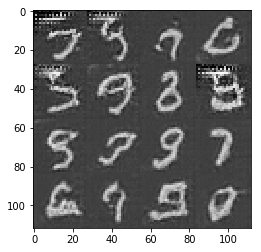

Epoch 2/2..., step 1310 Discriminator Loss: 1.0032... Generator Loss: 1.3785
Epoch 2/2..., step 1320 Discriminator Loss: 1.2123... Generator Loss: 1.2721
Epoch 2/2..., step 1330 Discriminator Loss: 0.8966... Generator Loss: 1.8245
Epoch 2/2..., step 1340 Discriminator Loss: 1.1437... Generator Loss: 2.3432
Epoch 2/2..., step 1350 Discriminator Loss: 1.2656... Generator Loss: 1.7918
Epoch 2/2..., step 1360 Discriminator Loss: 0.8821... Generator Loss: 1.6584
Epoch 2/2..., step 1370 Discriminator Loss: 0.9057... Generator Loss: 2.5840
Epoch 2/2..., step 1380 Discriminator Loss: 1.0468... Generator Loss: 1.3744
Epoch 2/2..., step 1390 Discriminator Loss: 0.9045... Generator Loss: 2.5223
Epoch 2/2..., step 1400 Discriminator Loss: 0.7636... Generator Loss: 1.8349


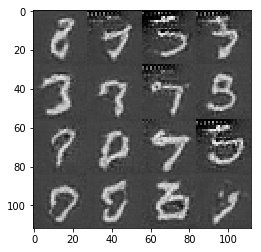

Epoch 2/2..., step 1410 Discriminator Loss: 1.0498... Generator Loss: 1.3566
Epoch 2/2..., step 1420 Discriminator Loss: 0.9002... Generator Loss: 1.9859
Epoch 2/2..., step 1430 Discriminator Loss: 0.8624... Generator Loss: 2.3272
Epoch 2/2..., step 1440 Discriminator Loss: 1.2289... Generator Loss: 0.8911
Epoch 2/2..., step 1450 Discriminator Loss: 0.8917... Generator Loss: 2.4648
Epoch 2/2..., step 1460 Discriminator Loss: 1.4373... Generator Loss: 1.2357
Epoch 2/2..., step 1470 Discriminator Loss: 1.3858... Generator Loss: 0.9734
Epoch 2/2..., step 1480 Discriminator Loss: 0.9735... Generator Loss: 1.9983
Epoch 2/2..., step 1490 Discriminator Loss: 1.1432... Generator Loss: 1.1834
Epoch 2/2..., step 1500 Discriminator Loss: 0.8606... Generator Loss: 2.0581


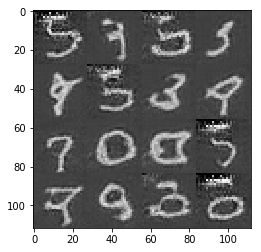

Epoch 2/2..., step 1510 Discriminator Loss: 1.1408... Generator Loss: 1.4132
Epoch 2/2..., step 1520 Discriminator Loss: 0.8527... Generator Loss: 2.2571
Epoch 2/2..., step 1530 Discriminator Loss: 0.8632... Generator Loss: 1.7735
Epoch 2/2..., step 1540 Discriminator Loss: 1.0049... Generator Loss: 1.5947
Epoch 2/2..., step 1550 Discriminator Loss: 0.7048... Generator Loss: 2.8168
Epoch 2/2..., step 1560 Discriminator Loss: 0.9454... Generator Loss: 3.4666
Epoch 2/2..., step 1570 Discriminator Loss: 0.9956... Generator Loss: 1.4846
Epoch 2/2..., step 1580 Discriminator Loss: 0.6919... Generator Loss: 3.1283
Epoch 2/2..., step 1590 Discriminator Loss: 0.8028... Generator Loss: 2.5167
Epoch 2/2..., step 1600 Discriminator Loss: 1.9397... Generator Loss: 0.6178


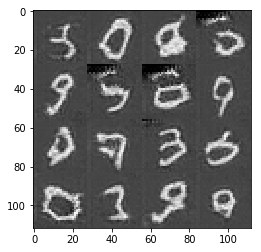

Epoch 2/2..., step 1610 Discriminator Loss: 1.0196... Generator Loss: 1.4456
Epoch 2/2..., step 1620 Discriminator Loss: 0.8552... Generator Loss: 2.1635
Epoch 2/2..., step 1630 Discriminator Loss: 1.6142... Generator Loss: 0.5419
Epoch 2/2..., step 1640 Discriminator Loss: 0.8807... Generator Loss: 1.8581
Epoch 2/2..., step 1650 Discriminator Loss: 0.9845... Generator Loss: 2.2337
Epoch 2/2..., step 1660 Discriminator Loss: 0.9524... Generator Loss: 1.4450
Epoch 2/2..., step 1670 Discriminator Loss: 0.7018... Generator Loss: 5.4416
Epoch 2/2..., step 1680 Discriminator Loss: 0.9291... Generator Loss: 2.4330
Epoch 2/2..., step 1690 Discriminator Loss: 0.9583... Generator Loss: 1.6896
Epoch 2/2..., step 1700 Discriminator Loss: 0.8583... Generator Loss: 2.1064


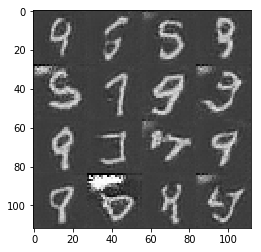

Epoch 2/2..., step 1710 Discriminator Loss: 0.9208... Generator Loss: 1.4190
Epoch 2/2..., step 1720 Discriminator Loss: 0.9072... Generator Loss: 3.0318
Epoch 2/2..., step 1730 Discriminator Loss: 0.9357... Generator Loss: 2.5885
Epoch 2/2..., step 1740 Discriminator Loss: 1.0849... Generator Loss: 1.1354
Epoch 2/2..., step 1750 Discriminator Loss: 0.8832... Generator Loss: 2.2792
Epoch 2/2..., step 1760 Discriminator Loss: 0.8492... Generator Loss: 2.9953
Epoch 2/2..., step 1770 Discriminator Loss: 0.8310... Generator Loss: 1.7242
Epoch 2/2..., step 1780 Discriminator Loss: 0.6528... Generator Loss: 2.8297
Epoch 2/2..., step 1790 Discriminator Loss: 0.9099... Generator Loss: 1.8203
Epoch 2/2..., step 1800 Discriminator Loss: 1.1569... Generator Loss: 1.2317


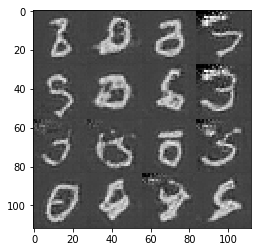

Epoch 2/2..., step 1810 Discriminator Loss: 1.3973... Generator Loss: 1.3970
Epoch 2/2..., step 1820 Discriminator Loss: 0.8750... Generator Loss: 2.0182
Epoch 2/2..., step 1830 Discriminator Loss: 0.7702... Generator Loss: 2.0267
Epoch 2/2..., step 1840 Discriminator Loss: 0.8646... Generator Loss: 1.5843
Epoch 2/2..., step 1850 Discriminator Loss: 0.8529... Generator Loss: 2.0686
Epoch 2/2..., step 1860 Discriminator Loss: 1.0936... Generator Loss: 1.0676
Epoch 2/2..., step 1870 Discriminator Loss: 0.7767... Generator Loss: 2.1062


In [53]:
batch_size = 64
z_dim = 128
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1..., step 10 Discriminator Loss: 0.4787... Generator Loss: 3.9786
Epoch 1/1..., step 20 Discriminator Loss: 0.6259... Generator Loss: 4.7967
Epoch 1/1..., step 30 Discriminator Loss: 0.4635... Generator Loss: 2.9676
Epoch 1/1..., step 40 Discriminator Loss: 0.4598... Generator Loss: 3.3190
Epoch 1/1..., step 50 Discriminator Loss: 0.5077... Generator Loss: 2.3024
Epoch 1/1..., step 60 Discriminator Loss: 0.4244... Generator Loss: 4.4470
Epoch 1/1..., step 70 Discriminator Loss: 0.3770... Generator Loss: 4.5808
Epoch 1/1..., step 80 Discriminator Loss: 0.3803... Generator Loss: 4.5018
Epoch 1/1..., step 90 Discriminator Loss: 0.3550... Generator Loss: 4.8141
Epoch 1/1..., step 100 Discriminator Loss: 0.3875... Generator Loss: 4.4244


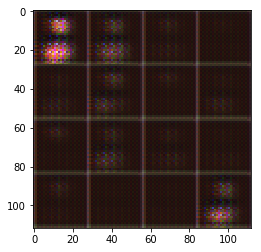

Epoch 1/1..., step 110 Discriminator Loss: 0.9309... Generator Loss: 5.4434
Epoch 1/1..., step 120 Discriminator Loss: 0.9104... Generator Loss: 3.4222
Epoch 1/1..., step 130 Discriminator Loss: 0.8921... Generator Loss: 2.4647
Epoch 1/1..., step 140 Discriminator Loss: 0.9185... Generator Loss: 3.0203
Epoch 1/1..., step 150 Discriminator Loss: 0.6604... Generator Loss: 3.8101
Epoch 1/1..., step 160 Discriminator Loss: 0.9475... Generator Loss: 2.0857
Epoch 1/1..., step 170 Discriminator Loss: 0.9132... Generator Loss: 2.7334
Epoch 1/1..., step 180 Discriminator Loss: 0.8457... Generator Loss: 2.1593
Epoch 1/1..., step 190 Discriminator Loss: 1.2550... Generator Loss: 1.4376
Epoch 1/1..., step 200 Discriminator Loss: 1.0264... Generator Loss: 1.8717


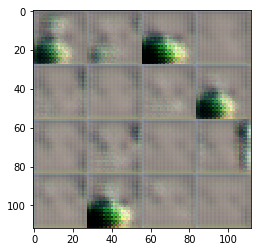

Epoch 1/1..., step 210 Discriminator Loss: 1.2642... Generator Loss: 1.4436
Epoch 1/1..., step 220 Discriminator Loss: 1.1484... Generator Loss: 1.1816
Epoch 1/1..., step 230 Discriminator Loss: 0.9898... Generator Loss: 1.9110
Epoch 1/1..., step 240 Discriminator Loss: 1.2167... Generator Loss: 2.1553
Epoch 1/1..., step 250 Discriminator Loss: 0.9438... Generator Loss: 2.9641
Epoch 1/1..., step 260 Discriminator Loss: 1.0381... Generator Loss: 1.5057
Epoch 1/1..., step 270 Discriminator Loss: 1.1669... Generator Loss: 1.8983
Epoch 1/1..., step 280 Discriminator Loss: 1.1023... Generator Loss: 1.8400
Epoch 1/1..., step 290 Discriminator Loss: 1.1465... Generator Loss: 1.6096
Epoch 1/1..., step 300 Discriminator Loss: 1.1795... Generator Loss: 1.2018


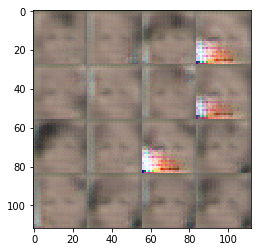

Epoch 1/1..., step 310 Discriminator Loss: 1.2201... Generator Loss: 2.0941
Epoch 1/1..., step 320 Discriminator Loss: 1.0779... Generator Loss: 2.9192
Epoch 1/1..., step 330 Discriminator Loss: 1.2046... Generator Loss: 1.6892
Epoch 1/1..., step 340 Discriminator Loss: 1.2268... Generator Loss: 1.7508
Epoch 1/1..., step 350 Discriminator Loss: 1.0693... Generator Loss: 1.8376
Epoch 1/1..., step 360 Discriminator Loss: 1.1652... Generator Loss: 1.7090
Epoch 1/1..., step 370 Discriminator Loss: 1.2070... Generator Loss: 1.5081
Epoch 1/1..., step 380 Discriminator Loss: 1.1834... Generator Loss: 1.9763
Epoch 1/1..., step 390 Discriminator Loss: 1.1159... Generator Loss: 1.4474
Epoch 1/1..., step 400 Discriminator Loss: 1.0500... Generator Loss: 1.4429


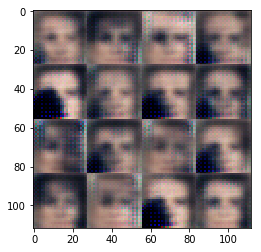

Epoch 1/1..., step 410 Discriminator Loss: 1.2575... Generator Loss: 1.4390
Epoch 1/1..., step 420 Discriminator Loss: 1.1255... Generator Loss: 1.7676
Epoch 1/1..., step 430 Discriminator Loss: 1.0774... Generator Loss: 2.2485
Epoch 1/1..., step 440 Discriminator Loss: 1.0624... Generator Loss: 1.5866
Epoch 1/1..., step 450 Discriminator Loss: 1.1355... Generator Loss: 1.4800
Epoch 1/1..., step 460 Discriminator Loss: 1.0145... Generator Loss: 2.4736
Epoch 1/1..., step 470 Discriminator Loss: 1.2144... Generator Loss: 1.5720
Epoch 1/1..., step 480 Discriminator Loss: 1.1708... Generator Loss: 1.6771
Epoch 1/1..., step 490 Discriminator Loss: 1.1541... Generator Loss: 1.5985
Epoch 1/1..., step 500 Discriminator Loss: 0.4845... Generator Loss: 4.0901


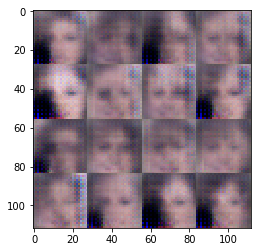

Epoch 1/1..., step 510 Discriminator Loss: 1.0442... Generator Loss: 1.7731
Epoch 1/1..., step 520 Discriminator Loss: 1.1226... Generator Loss: 1.8569
Epoch 1/1..., step 530 Discriminator Loss: 1.1478... Generator Loss: 2.7059
Epoch 1/1..., step 540 Discriminator Loss: 1.1782... Generator Loss: 1.5011
Epoch 1/1..., step 550 Discriminator Loss: 1.0408... Generator Loss: 1.4774
Epoch 1/1..., step 560 Discriminator Loss: 1.2404... Generator Loss: 1.1761
Epoch 1/1..., step 570 Discriminator Loss: 1.1975... Generator Loss: 1.5935
Epoch 1/1..., step 580 Discriminator Loss: 1.2794... Generator Loss: 1.4134
Epoch 1/1..., step 590 Discriminator Loss: 1.3293... Generator Loss: 0.9722
Epoch 1/1..., step 600 Discriminator Loss: 1.2123... Generator Loss: 1.5348


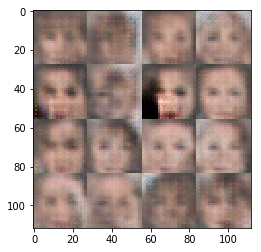

Epoch 1/1..., step 610 Discriminator Loss: 1.1975... Generator Loss: 1.5949
Epoch 1/1..., step 620 Discriminator Loss: 1.1295... Generator Loss: 2.2577
Epoch 1/1..., step 630 Discriminator Loss: 1.0880... Generator Loss: 2.0095
Epoch 1/1..., step 640 Discriminator Loss: 1.3430... Generator Loss: 1.7381
Epoch 1/1..., step 650 Discriminator Loss: 1.2877... Generator Loss: 1.3155
Epoch 1/1..., step 660 Discriminator Loss: 1.3192... Generator Loss: 1.8756
Epoch 1/1..., step 670 Discriminator Loss: 1.1886... Generator Loss: 2.0790
Epoch 1/1..., step 680 Discriminator Loss: 1.2835... Generator Loss: 1.1814
Epoch 1/1..., step 690 Discriminator Loss: 0.8175... Generator Loss: 2.1731
Epoch 1/1..., step 700 Discriminator Loss: 1.0881... Generator Loss: 1.2513


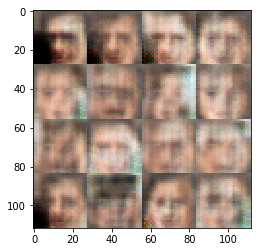

Epoch 1/1..., step 710 Discriminator Loss: 1.2094... Generator Loss: 1.9923
Epoch 1/1..., step 720 Discriminator Loss: 1.2314... Generator Loss: 1.4958
Epoch 1/1..., step 730 Discriminator Loss: 1.1848... Generator Loss: 1.2646
Epoch 1/1..., step 740 Discriminator Loss: 1.0446... Generator Loss: 2.9480
Epoch 1/1..., step 750 Discriminator Loss: 1.1723... Generator Loss: 1.0470
Epoch 1/1..., step 760 Discriminator Loss: 1.3551... Generator Loss: 1.5473
Epoch 1/1..., step 770 Discriminator Loss: 1.2408... Generator Loss: 1.1586
Epoch 1/1..., step 780 Discriminator Loss: 1.2468... Generator Loss: 1.1573
Epoch 1/1..., step 790 Discriminator Loss: 1.2627... Generator Loss: 1.3988
Epoch 1/1..., step 800 Discriminator Loss: 1.1299... Generator Loss: 1.4973


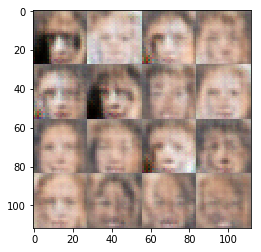

Epoch 1/1..., step 810 Discriminator Loss: 1.1835... Generator Loss: 1.2765
Epoch 1/1..., step 820 Discriminator Loss: 1.1249... Generator Loss: 1.4074
Epoch 1/1..., step 830 Discriminator Loss: 1.1410... Generator Loss: 1.3416
Epoch 1/1..., step 840 Discriminator Loss: 1.0660... Generator Loss: 1.5096
Epoch 1/1..., step 850 Discriminator Loss: 1.1736... Generator Loss: 1.6164
Epoch 1/1..., step 860 Discriminator Loss: 1.2199... Generator Loss: 1.0193
Epoch 1/1..., step 870 Discriminator Loss: 0.8996... Generator Loss: 1.6154
Epoch 1/1..., step 880 Discriminator Loss: 1.1586... Generator Loss: 1.5929
Epoch 1/1..., step 890 Discriminator Loss: 1.2576... Generator Loss: 1.2993
Epoch 1/1..., step 900 Discriminator Loss: 1.3669... Generator Loss: 1.3879


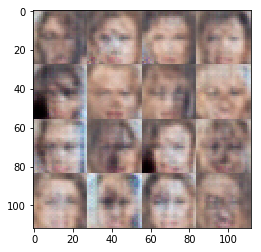

Epoch 1/1..., step 910 Discriminator Loss: 1.1949... Generator Loss: 1.2350


KeyboardInterrupt: 

In [54]:
batch_size = 64
z_dim = 256
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.